In [121]:
import gc
import pprint
import hashlib
import tqdm

import numpy  as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn           as sns

import torch
import torch.nn as nn
import torch.nn.functional as F

from IPython.display import display

In [2]:
df = pd.read_csv('~/Documents/data/cartola-fc-brasil-scouts/jogadores.csv')

df['id']  = df['Nome'].apply( lambda x: hashlib.sha1(str.encode(x)).hexdigest() )
df['pos'] = df['Nome'].apply( lambda x: x.split('(')[-1].split(')')[0].strip() )

display( df.sort_values(by="Nome") )

scouts  = ['DS','G','A','SG','FS','FF','FD','FT','DD','DP','GC','CV','CA','PP','GS','FC','I','PI','RB','PE']
mercado = ['Preço', 'Média','Variação']
keys    = ["id", "ano"]

gscouts = df.groupby(keys)[scouts].agg(['sum'])
gscouts.columns = gscouts.columns.map('_'.join)
gscouts = gscouts.reset_index()

gmercado = df.groupby(keys)[mercado].agg(['sum'])
gmercado.columns = gmercado.columns.map('_'.join)
gmercado = gmercado.reset_index()

gpos = df.groupby(keys)[['pos']].agg(['first'])
gpos.columns = gpos.columns.map('_'.join)
gpos = gpos.reset_index()

display(gscouts.sample(5))
display(gmercado.sample(5))
display(gpos.sample(5))

display(gpos['pos_first'].value_counts())

,Nome,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,...,GS,FC,I,PI,rodada,ano,RB,PE,id,pos
7240,Abel Braga (TEC),Internacional,11.46,16.0,3.78,4.74,0.73,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,36,2020,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
6793,Abel Braga (TEC),Internacional,11.31,14.0,3.96,3.14,-0.18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,34,2020,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
6213,Abel Braga (TEC),Internacional,11.71,11.0,4.11,7.06,0.48,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31,2020,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
8622,Abel Braga (TEC),Flamengo,10.28,4.0,3.58,4.30,0.43,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,2019,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
8840,Abel Braga (TEC),Flamengo,10.53,5.0,3.82,4.79,0.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5,2019,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14192,Éverson (GOL),Santos,9.79,23.0,4.25,8.00,-0.06,NaN,NaN,NaN,...,20.0,1.0,NaN,NaN,29,2019,NaN,34.0,6d99fcc3bc6b30aced0353e17beee4f211c2ee4a,GOL
10828,Éverson (GOL),Santos,8.62,8.0,4.36,6.20,1.45,NaN,NaN,NaN,...,6.0,NaN,NaN,NaN,14,2019,NaN,7.0,6d99fcc3bc6b30aced0353e17beee4f211c2ee4a,GOL
7848,Ênio (MEI),Botafogo,0.85,4.0,1.35,-0.20,-0.53,2.0,NaN,NaN,...,NaN,1.0,1.0,12.0,38,2020,NaN,NaN,98db7cfc8e99fe42e23ab3d1f8b9359815e9c023,MEI
7589,Ênio (MEI),Botafogo,1.38,3.0,1.87,3.10,0.32,2.0,NaN,NaN,...,NaN,NaN,1.0,3.0,37,2020,NaN,NaN,98db7cfc8e99fe42e23ab3d1f8b9359815e9c023,MEI


,id,ano,DS_sum,G_sum,A_sum,SG_sum,FS_sum,FF_sum,FD_sum,FT_sum,...,GC_sum,CV_sum,CA_sum,PP_sum,GS_sum,FC_sum,I_sum,PI_sum,RB_sum,PE_sum
15,02298558fc62de33ac20df652f71cf734bd41237,2020,80.0,0.0,0.0,0.0,25.0,12.0,11.0,0.0,...,0.0,0.0,19.0,0.0,0.0,75.0,0.0,149.0,0.0,0.0
1254,fa81716fb18d99919931dae046b2dea713ae2036,2020,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,21.0,0.0,0.0,98.0,0.0,0.0
268,3216f76537a923f901ca7f02f22bf47a4f2cc002,2020,53.0,7.0,19.0,0.0,81.0,31.0,18.0,0.0,...,0.0,0.0,11.0,0.0,0.0,66.0,0.0,253.0,0.0,0.0
557,6ca56a7d80b22f0bd2f979848820347ba945daa1,2020,809.0,14.0,24.0,0.0,646.0,167.0,126.0,0.0,...,0.0,0.0,57.0,0.0,0.0,322.0,35.0,2598.0,0.0,0.0
1073,d7fd32c89a4eb2eed369c45871790f8fd43e5cc1,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,id,ano,Preço_sum,Média_sum,Variação_sum
27,04b1f8558ecd4fec1c6d96a9aad8ab2a75771229,2019,138.72,36.82,-2.22
597,7709a17ad466995ef2870dd1f3a499a96c1f7e6e,2020,218.52,85.95,4.27
1258,fbd932aea7f01c99bfb2368ab4c7e3e840e015e2,2019,1.79,-0.10,-0.39
924,b74c1950b9d812c347c3ff8cdc4d233e436c9099,2020,13.02,4.42,-1.67
180,20426114ee2f8b68b1fe2479b073295350b18ad7,2020,123.34,98.51,2.94


,id,ano,pos_first
497,61da772d29db083dd7e9d9c156b5671ecfec1b1f,2019,ZAG
613,79471fa35f3143ed842e45095f0f50314476b2a9,2020,ATA
1054,d4be38a7845b32c17edd1b405c9efb8651670788,2020,ZAG
558,6caa90102c9e83a1c5e6fef4c9992eb00ce4d533,2020,GOL
732,940511f49a13679e4338c3ba7feee1bd5bfbfb71,2019,LAT


MEI    408
ATA    285
ZAG    203
LAT    200
GOL     96
TEC     91
Name: pos_first, dtype: int64

# feedforward neural network

## teoria

_A perceptron is always feedforward, that is, all the arrows are going in the direction of the output. Neural networks in general might have loops, and if so, are often called recurrent networks. (...) Finally, having multiple layers means more than two layers, that is, you have hidden layers. A perceptron is a network with two layers, one input and one output. A multilayered network means that you have at least one hidden layer (we call all the layers between the input and output layers hidden)._ [ref](https://cs.stackexchange.com/a/53656)

## codigo

### binário

In [65]:
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X = pd.concat([gscouts.drop(columns=keys), gmercado.drop(columns=keys)], axis=1).copy(); X_columns = X.columns
X = X.astype(np.float64).fillna(0.0).values
X = scaler.fit_transform( X )

y = np.where(gpos['pos_first']=='ATA', 1, 0)

In [66]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size = 0.2, random_state = 37)

- - -

In [67]:
print(torch.cuda.is_available(), torch.cuda.current_device())
print(torch.cuda.get_device_name(torch.cuda.current_device()))

True 0
GeForce GTX 1660 Ti


In [166]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('using device:', device)

using device: cuda


In [167]:
if device.type == 'cuda':
    print('memory usage:')
    print('allocated   :', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('cached      :', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

memory usage:
allocated   : 0.0 GB
cached      : 0.0 GB


In [70]:
Xt = torch.from_numpy(X_train).type(torch.FloatTensor)
Xh = torch.from_numpy(X_holdout).type(torch.FloatTensor)
yt = torch.from_numpy(y_train).type(torch.LongTensor)
yh = torch.from_numpy(y_holdout).type(torch.LongTensor) 

In [71]:
print(Xt.shape)
print(Xh.shape)
print(yt.shape)
print(yh.shape)

torch.Size([1026, 23])
torch.Size([257, 23])
torch.Size([1026])
torch.Size([257])


In [72]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(23, 3)
        self.fc2 = nn.Linear(3, 2)
        
    def forward(self,x):
        x = self.fc1(x) # 1st layer
        x = torch.tanh(x)   # hidden layer
        x = self.fc2(x) # output layer
        return x
        
    def predict(self,x):
        pred = F.softmax(self.forward(x), dim=1)
        ans  = []
        for t in pred:
            if t[0] > t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

In [73]:
rede = Net()
crt  = nn.CrossEntropyLoss()
opt = torch.optim.Adam(rede.parameters(), lr=0.01)

treino

In [74]:
%%time
epochs = 10000
losses = []

for i in range(epochs):
    y_pred = rede.forward(Xt)
    loss   = crt(y_pred, yt)
    losses.append( loss.item() )
    
    opt.zero_grad() # clear the previous gradients
    loss.backward() # compute gradients
    opt.step()      # adjust weights

CPU times: user 1min 50s, sys: 1.73 s, total: 1min 51s
Wall time: 7.92 s


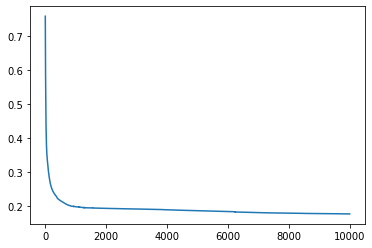

In [75]:
plt.plot(range(epochs), losses);

In [76]:
from sklearn.metrics import accuracy_score

print("treino :", accuracy_score(rede.predict(Xt), yt))
print("teste  :", accuracy_score(rede.predict(Xh), yh))

treino : 0.9220272904483431
teste  : 0.8871595330739299


### multiclasse

In [239]:
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from sklearn.metrics  import confusion_matrix, classification_report

X = pd.concat([gscouts.drop(columns=keys), gmercado.drop(columns=keys)], axis=1).copy(); X_columns = X.columns
X = X.astype(np.float64).fillna(0.0).values
X = scaler.fit_transform( X )

y = gpos['pos_first'].astype('category').cat.codes.values

In [240]:
class ClassifierDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

In [241]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size = 0.2, random_state = 37)

train_dataset   = ClassifierDataset(torch.from_numpy(X_train).float(), 
                                    torch.from_numpy(y_train).long())
holdout_dataset = ClassifierDataset(torch.from_numpy(X_holdout).float(), 
                                    torch.from_numpy(y_holdout).long())

In [242]:
EPOCHS        = 1000
BATCH_SIZE    = 16
LEARNING_RATE = 0.007
NUM_FEATURES  = X.shape[1]
NUM_CLASSES   = len(np.unique(y))

In [243]:
target_list = []

for _, t in train_dataset:
    target_list.append(t)
    
target_list = torch.tensor(target_list)
target_list = target_list[torch.randperm(len(target_list))]

In [244]:
class_count       = pd.Series(y_train).value_counts().sort_index().values
class_weights     = 1./torch.tensor(class_count, dtype=torch.float) 
class_weights_all = class_weights[target_list]

print(target_list)
print(class_weights)
print(class_weights_all)

tensor([1, 0, 3,  ..., 1, 1, 2])
tensor([0.0043, 0.0125, 0.0061, 0.0032, 0.0139, 0.0062])
tensor([0.0125, 0.0043, 0.0032,  ..., 0.0125, 0.0125, 0.0061])


In [245]:
weighted_sampler = WeightedRandomSampler(weights     = class_weights_all,
                                         num_samples = len(class_weights_all),
                                         replacement = True)

In [246]:
train_loader = DataLoader(dataset    = train_dataset,
                          batch_size = BATCH_SIZE,
                          sampler    = weighted_sampler)
holdout_loader = DataLoader(dataset    = holdout_dataset, 
                            batch_size = 1)

In [262]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer_1 = nn.Linear(NUM_FEATURES, 64)
        self.layer_2 = nn.Linear(64, 32)
        self.layer_3 = nn.Linear(32, 16)
        self.layer_o = nn.Linear(16, NUM_CLASSES)
        
        self.relu    = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(32)
        self.batchnorm3 = nn.BatchNorm1d(16)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_o(x)
        
        return x

In [263]:
rede = Net()
crt  = nn.CrossEntropyLoss()
opt  = torch.optim.Adam(rede.parameters(), lr=LEARNING_RATE)
rede.to(device)

print(rede)

Net(
  (layer_1): Linear(in_features=23, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=16, bias=True)
  (layer_o): Linear(in_features=16, out_features=6, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [264]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    correct_pred   = (y_pred_tags == y_test).float()
    
    acc = correct_pred.sum() / len(correct_pred)
    acc = torch.round(acc * 100)
    
    return acc

In [265]:
acc_stats  = { "train": [],
               "val"  : []}
loss_stats = {"train": [],
              "val": []}

In [ ]:
for e in tqdm.tqdm(range(EPOCHS)):
    train_epoch_loss = 0
    train_epoch_acc  = 0
    rede.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch = X_train_batch.to(device)
        y_train_batch = y_train_batch.to(device)
        opt.zero_grad()
        
        y_train_pred = rede(X_train_batch)
        
        train_loss = crt(y_train_pred, y_train_batch)
        train_acc  = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        opt.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc  += train_acc.item()
        
    with torch.no_grad():
        val_epoch_loss = 0
        val_epoch_acc  = 0
        rede.eval()
        for X_val_batch, y_val_batch in holdout_loader:
            X_val_batch = X_val_batch.to(device)
            y_val_batch = y_val_batch.to(device)
            
            y_val_pred = rede(X_val_batch)
                        
            val_loss = crt(y_val_pred, y_val_batch)
            val_acc  = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc  += val_acc.item()
    
    loss_stats['train'].append(train_epoch_acc/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(holdout_loader))
    acc_stats['train'].append(train_epoch_acc/len(train_loader))
    acc_stats['val'].append(val_epoch_acc/len(holdout_loader))
                              
    print(f"Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(holdout_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(holdout_loader):.3f}")

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

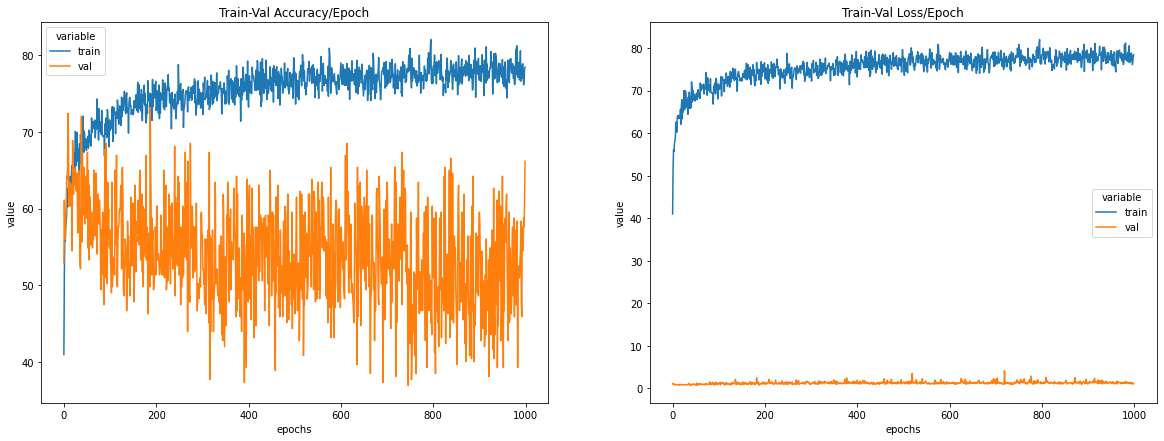

In [267]:
train_val_acc_df  = pd.DataFrame.from_dict(acc_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

In [268]:
y_pred_list = []

with torch.no_grad():
    rede.eval()
    for X_batch, _ in holdout_loader:
        X_batch        = X_batch.to(device)
        y_test_pred    = rede(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [269]:
gpos['pos_first'].astype('category').cat.categories

Index(['ATA', 'GOL', 'LAT', 'MEI', 'TEC', 'ZAG'], dtype='object')

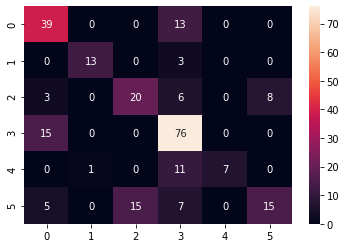

In [270]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_holdout, y_pred_list))
sns.heatmap(confusion_matrix_df, annot=True);

In [271]:
print(classification_report(y_holdout, y_pred_list))

              precision    recall  f1-score   support

           0       0.63      0.75      0.68        52
           1       0.93      0.81      0.87        16
           2       0.57      0.54      0.56        37
           3       0.66      0.84      0.73        91
           4       1.00      0.37      0.54        19
           5       0.65      0.36      0.46        42

    accuracy                           0.66       257
   macro avg       0.74      0.61      0.64       257
weighted avg       0.68      0.66      0.65       257



- - -

**referências**

[binary classifier using pytorch by prudvi rajkumar](https://medium.com/@prudhvirajnitjsr/simple-classifier-using-pytorch-37fba175c25c)<br/>
[pytorch - nn.linear](https://www.sharetechnote.com/html/Python_PyTorch_nn_Linear_01.html)

[PyTorch [Tabular] —Multiclass Classification | by Akshaj Verma | Towards Data Science](https://towardsdatascience.com/pytorch-tabular-multiclass-classification-9f8211a123ab)

* [Principal Component Analysis](https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)
* [Blog](https://sebastianraschka.com/blog/index.html)
* [Naive Bayes and Text Classification](https://sebastianraschka.com/Articles/2014_naive_bayes_1.html)
* [Index of /Articles](https://sebastianraschka.com/Articles/)
* [boosting classifier benchmark - Pesquisa Google](https://www.google.com/search?q=boosting+classifier+benchmark&client=ubuntu&hs=VsE&channel=fs&ei=bItgYPLROPTD5OUPkOuMkA0&oq=boosting+classifier+benck&gs_lcp=Cgdnd3Mtd2l6EAMYADIHCCEQChCgATIHCCEQChCgATIHCCEQChCgATIHCCEQChCgATIECCEQFToHCAAQRxCwAzoGCAAQFhAeOggIABAWEAoQHjoCCAA6BAgAEBM6CAgAEBYQHhATOgUIIRCgAVDNU1iGkAFg25kBaAJwAngAgAGpAYgB_hiSAQQyLjI1mAEAoAEBqgEHZ3dzLXdpesgBCMABAQ&sclient=gws-wiz)
* [Comparing 13 Algorithms on 165 Datasets (hint: use Gradient Boosting)](https://machinelearningmastery.com/start-with-gradient-boosting/)
* [Credit Card Fraud Detection using Autoencoders in Keras | TensorFlow for Hackers (Part VII) | Curiousily - Hacker's Guide to Machine Learning](https://curiousily.com/posts/credit-card-fraud-detection-using-autoencoders-in-keras/)
* [boosting vs neural network - Pesquisa Google](https://www.google.com/search?channel=fs&client=ubuntu&q=boosting+vs+neural+network)
* [classification - Deep Learning vs gradient boosting: When to use what? - Data Science Stack Exchange](https://datascience.stackexchange.com/questions/2504/deep-learning-vs-gradient-boosting-when-to-use-what)
* [machine learning - Why neural networks do not perform well on structured data? - Data Science Stack Exchange](https://datascience.stackexchange.com/questions/38392/why-neural-networks-do-not-perform-well-on-structured-data)
* [machine learning - Gradient Boosted Trees or Neural Networks Using Model Averaging? - Data Science Stack Exchange](https://datascience.stackexchange.com/questions/12147/gradient-boosted-trees-or-neural-networks-using-model-averaging)
* [In what situations do neural networks outperform gradient boosting and random forest models on regular numeric and categorical data (non-image or text data) if any? - Quora](https://www.quora.com/In-what-situations-do-neural-networks-outperform-gradient-boosting-and-random-forest-models-on-regular-numeric-and-categorical-data-non-image-or-text-data-if-any)
* [kinds of neural networks - Pesquisa Google](https://www.google.com/search?channel=fs&client=ubuntu&q=kinds+of+neural+networks)
* [Types of Neural Networks and Definition of Neural Network](https://www.mygreatlearning.com/blog/types-of-neural-networks/)
* [PyTorch: Introduction to Neural Network — Feedforward / MLP | by Andrea Eunbee Jang | BiaslyAI | Medium](https://medium.com/biaslyai/pytorch-introduction-to-neural-network-feedforward-neural-network-model-e7231cff47cb)
* [A Comprehensive Guide To Types Of Neural Networks](https://www.digitalvidya.com/blog/types-of-neural-networks/)
* [Feedforward Neural Networks and Multilayer Perceptrons - Boostedml](https://boostedml.com/2020/04/feedforward-neural-networks-and-multilayer-perceptrons.html)
* [Introduction to PyTorch for Classification](https://stackabuse.com/introduction-to-pytorch-for-classification/)
* [Binary Classifier using PyTorch. binary classifier on sklearn.moons… | by Prudvi RajKumar | Medium](https://medium.com/@prudhvirajnitjsr/simple-classifier-using-pytorch-37fba175c25c)
* [Learning PyTorch with Examples — PyTorch Tutorials 1.8.1+cu102 documentation](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)
* [mlp parameters - Google Search](https://www.google.com/search?q=mlp+parameters&tbm=isch&ved=2ahUKEwialPaPltTvAhUvGLkGHZBvD0sQ2-cCegQIABAA&oq=mlp+parameters&gs_lcp=CgNpbWcQAzIECAAQGDIECAAQGDoCCAA6BAgAEB46BggAEAgQHlD2-hVY75AWYNmRFmgAcAB4AIAB6gGIAfQLkgEFMy44LjGYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=ehVhYJrvIq-w5OUPkN-92AQ&bih=979&biw=933&client=ubuntu&hs=5O3#imgrc=LKCBfeQmZAws9M&imgdii=PEJ6KaL7KSzMvM)
* [ShareTechnote - 5G - What is 5G ?](https://www.sharetechnote.com/html/Python_PyTorch_nn_Linear_01.html)
* [Neural Networks — PyTorch Tutorials 1.8.1+cu102 documentation](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html)
* [Guide to Encoding Categorical Values in Python - Practical Business Python](https://pbpython.com/categorical-encoding.html)
* [PyTorch [Tabular] —Multiclass Classification | by Akshaj Verma | Towards Data Science](https://towardsdatascience.com/pytorch-tabular-multiclass-classification-9f8211a123ab)